In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn

In [2]:
oecd_bli = pd.read_csv('data/lifesat/oecd_bli_2015.csv',thousands=',')
gdp_per_capita = pd.read_csv('data/lifesat/gdp_per_capita.csv',thousands=',',delimiter='\t',encoding='latin1',na_values='n/a')

In [3]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [4]:
country_stats = prepare_country_stats(oecd_bli,gdp_per_capita)

In [5]:
X = np.c_[country_stats['GDP per capita']]
y = np.c_[country_stats['Life satisfaction']]

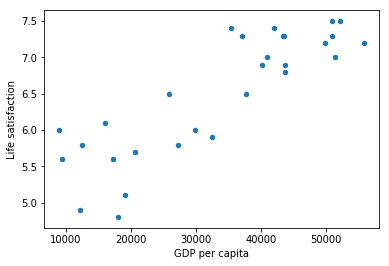

In [6]:
country_stats.plot(kind='scatter',x='GDP per capita',y='Life satisfaction')
plt.show()

In [7]:
from sklearn.linear_model import LinearRegression
lin_reg_model = LinearRegression()

In [8]:
lin_reg_model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [9]:
X_new = [[22587]]
print(lin_reg_model.predict(X_new))

[[5.96242338]]


In [10]:
from sklearn.neighbors import KNeighborsRegressor
clf = KNeighborsRegressor(n_neighbors=3)

In [11]:
clf.fit(X,y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=3, p=2,
          weights='uniform')

In [12]:
clf.predict(X_new)

array([[5.76666667]])

In [13]:
housing = pd.read_csv('data/housing/housing.csv')

In [14]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [15]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [16]:
from sklearn.model_selection import StratifiedShuffleSplit

In [17]:
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)

In [18]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [19]:
housing['income_cat'] = np.ceil(housing['median_income']/1.5)
housing['income_cat'].where(housing['income_cat'] <5,5.0,inplace=True)
for train_index,test_index in split.split(housing,housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [20]:
housing['income_cat'].value_counts()/len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [21]:
strat_train_set['income_cat'].value_counts()/len(strat_train_set)

3.0    0.350594
2.0    0.318859
4.0    0.176296
5.0    0.114402
1.0    0.039850
Name: income_cat, dtype: float64

In [22]:
housing = strat_train_set.copy()

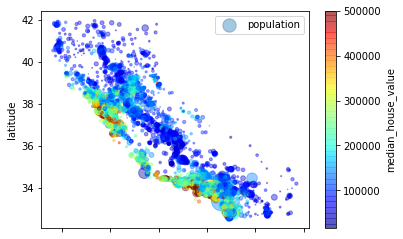

In [23]:
housing.plot(kind='scatter',x='longitude',y='latitude',alpha=0.4,
             s=housing['population']/100,label='population',
             c='median_house_value',cmap=plt.get_cmap('jet'),colorbar=True,)
plt.legend()

In [24]:
corr_matrix = housing.corr()

In [25]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
income_cat            0.642274
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

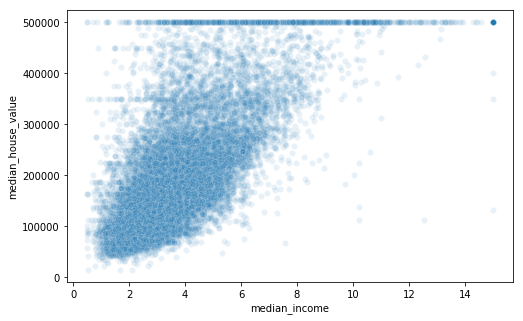

In [26]:
import seaborn as sns
plt.figure(figsize=(8,5))
sns.scatterplot(x='median_income',y='median_house_value',data=housing,alpha=0.1)
plt.show()

In [27]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']

In [28]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
income_cat                  0.642274
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

In [29]:
housing = strat_train_set.drop('median_house_value',axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

In [30]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy = 'median')

C:\tcl\Anaconda\envs\py3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [31]:
housing_num = housing.drop('ocean_proximity',axis=1)

In [32]:
imputer.fit(housing_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [33]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409,    3.    ])

In [34]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409,    3.    ])

In [35]:
X = imputer.transform(housing_num)

In [36]:
housing_tr = pd.DataFrame(X,columns=housing_num.columns)

In [37]:
imputer.strategy

'median'

In [38]:
from sklearn.preprocessing import LabelEncoder

In [70]:
encoder = LabelEncoder()
housing_cat = housing['ocean_proximity']
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded

array([0, 0, 4, ..., 1, 0, 3])

In [40]:
encoder.classes_

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

In [41]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot

C:\tcl\Anaconda\envs\py3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [42]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [43]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer(sparse_output=True)
housing_cat_1hot = encoder.fit_transform(housing_cat)
housing_cat_1hot.toarray()

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ...,
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

In [74]:
housing_cat.shape

(16512,)

In [79]:
encoder.fit_transform(housing_cat.values)

array([0, 0, 4, ..., 1, 0, 3])

In [44]:
from sklearn.base import BaseEstimator,TransformerMixin
rooms_ix,bedrooms_ix,population_ix,household_ix=3,4,5,6

In [45]:
class CombinedAttributesAdder(BaseEstimator,TransformerMixin):
    def __init__(self,add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        rooms_per_household = X[:,rooms_ix]/X[:,household_ix]
        population_per_household = X[:,population_ix]/X[:,household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room=X[:,bedrooms_ix]/X[:,rooms_ix]
            return np.c_[X,rooms_per_household,population_per_household,bedrooms_per_room]
        else:
            return np.c_[X,rooms_per_household,population_per_household]
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [47]:
num_pipeline = Pipeline([
    ('imputer',Imputer(strategy='median')),
    ('attribs_adder',CombinedAttributesAdder()),
    ('std_scaler',StandardScaler()),
])
housing_num_tr = num_pipeline.fit_transform(housing_num)

C:\tcl\Anaconda\envs\py3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [64]:
class DataFrameSelector(BaseEstimator,TransformerMixin):
    def __init__(self,attribute_names):
        self.attribute_names = attribute_names
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        return X[self.attribute_names].values

In [82]:
class MyLabelBinarizer(TransformerMixin):
    def __init__(self,*args,**kwargs):
        self.encoder = LabelBinarizer(*args,**kwargs)
    def fit(self,x,y=0):
        self.encoder.fit(x)
        return self
    def transform(self,x,y=0):
        return self.encoder.transform(x)

In [84]:
from sklearn.pipeline import FeatureUnion

num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

num_pipeline = Pipeline([
    ('selector',DataFrameSelector(num_attribs)),
    ('imputer',Imputer(strategy='median')),
    ('attribs_adder',CombinedAttributesAdder()),
    ('std_scaler',StandardScaler()),
    ])

cat_pipeline = Pipeline([
    ('selector',DataFrameSelector(cat_attribs)),
    ('label_binarizer',MyLabelBinarizer()),
    ])

full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline',num_pipeline),
    ('cat_pipeline',cat_pipeline),
    ])

C:\tcl\Anaconda\envs\py3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [85]:
housing_prepared = full_pipeline.fit_transform(housing)

In [87]:
housing_prepared.shape

(16512, 17)

In [90]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared,housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [93]:
some_data = housing.iloc[:5]
some_labels = housing_labels[:5]
some_data_prepared = full_pipeline.transform(some_data)
lin_reg.predict(some_data_prepared)

array([203682.37379543, 326371.39370781, 204218.64588245,  58685.4770482 ,
       194213.06443039])

In [94]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels,housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68376.64295459937

In [96]:
from sklearn.tree import DecisionTreeRegressor

tree_reg =DecisionTreeRegressor()
tree_reg.fit(housing_prepared,housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [97]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels,housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [98]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg,housing_prepared,housing_labels,scoring='neg_mean_squared_error',cv=10)

In [99]:
rmse_scores = np.sqrt(-scores)

In [101]:
rmse_scores.mean()

71031.5132134525

In [103]:
def display_scores(scores):
    print('socres',scores)
    print('mean',scores.mean())
    print('standard deviation',scores.std())

In [106]:
display_scores(rmse_scores)

socres [68987.71767489 67521.93924273 70522.69303983 69178.96342746
 72016.46813766 73848.22538429 70149.73179926 71532.05384554
 76403.62398955 70153.71559331]
mean 71031.5132134525
standard deviation 2444.3247377032912


In [107]:
lin_scores=cross_val_score(lin_reg,housing_prepared,housing_labels,scoring='neg_mean_squared_error',cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

In [110]:
display_scores(lin_rmse_scores)

socres [66877.52325028 66608.120256   70575.91118868 74179.94799352
 67683.32205678 71103.16843468 64782.65896552 67711.29940352
 71080.40484136 67687.6384546 ]
mean 68828.99948449331
standard deviation 2662.761570610344


In [114]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared,housing_labels)

C:\tcl\Anaconda\envs\py3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [115]:
forest_scores = cross_val_score(forest_reg,housing_prepared,housing_labels,scoring='neg_mean_squared_error',cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)

In [117]:
display_scores(forest_rmse_scores)

socres [51143.08958541 50075.97748928 52429.95331668 54307.53906727
 52405.07951745 56356.45216348 51236.35319451 50764.57436067
 56737.21007296 52204.33721795]
mean 52766.05659856657
standard deviation 2186.6055464070064


In [118]:
from sklearn.externals import joblib

In [120]:
full_pipeline_with_predictor=Pipeline([
    ('preparation',full_pipeline),
    ('linear',LinearRegression()),
])

full_pipeline_with_predictor.fit(housing,housing_labels)
full_pipeline_with_predictor.predict(some_data)


array([203682.37379543, 326371.39370781, 204218.64588245,  58685.4770482 ,
       194213.06443039])

In [121]:
my_model = full_pipeline_with_predictor

In [128]:
import os
if not os.path.isdir('output'):
    os.makedirs('output')
joblib.dump(my_model,'output/my_model.pkl')

['output/my_model.pkl']

In [129]:
my_model_loaded = joblib.load('output/my_model.pkl')

In [135]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators':[3,10,30],'max_features':[2,4,6,8]},
    {'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]},
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg,param_grid,cv=5,scoring='neg_mean_squared_error')

grid_search.fit(housing_prepared,housing_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [136]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [137]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

In [140]:
cvres = grid_search.cv_results_
for mean_score,params in zip(cvres['mean_test_score'],cvres['params']):
    print(np.sqrt(-mean_score),params)

64647.827324296566 {'max_features': 2, 'n_estimators': 3}
55615.47400938577 {'max_features': 2, 'n_estimators': 10}
53384.85169695044 {'max_features': 2, 'n_estimators': 30}
61739.52706737368 {'max_features': 4, 'n_estimators': 3}
53675.18876816007 {'max_features': 4, 'n_estimators': 10}
51266.44056137841 {'max_features': 4, 'n_estimators': 30}
59078.21801809709 {'max_features': 6, 'n_estimators': 3}
53337.69564443263 {'max_features': 6, 'n_estimators': 10}
50883.204885920335 {'max_features': 6, 'n_estimators': 30}
58935.18898844015 {'max_features': 8, 'n_estimators': 3}
53190.00385792642 {'max_features': 8, 'n_estimators': 10}
50866.131300121706 {'max_features': 8, 'n_estimators': 30}
62670.153286752495 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54560.325721418536 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59784.94696699733 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
53204.86563940633 {'bootstrap': False, 'max_features': 3, 'n_estimators

In [142]:
feature_importances = grid_search.best_estimator_.feature_importances_

In [144]:
feature_importances

array([6.73519004e-02, 5.79088470e-02, 4.57298891e-02, 1.53785338e-02,
       1.60542845e-02, 1.55666450e-02, 1.52769271e-02, 2.86642952e-01,
       1.09317288e-01, 3.66256140e-02, 1.04983954e-01, 5.91100233e-02,
       6.02808756e-03, 1.57313930e-01, 1.61352126e-04, 2.59042692e-03,
       3.95934504e-03])

In [146]:
extra_attribs = ['rooms_per_hhold','popo_per_hhold','bedrooms_per_room']
cat_one_hot_attribs = list(encoder.classes_)
attributes = num_attribs + extra_attribs + cat_one_hot_attribs

In [147]:
sorted(zip(feature_importances,attributes),reverse=True)

[(0.2866429519005458, 'median_income'),
 (0.15731393038590127, 'INLAND'),
 (0.10931728776349058, 'income_cat'),
 (0.10498395410961989, 'popo_per_hhold'),
 (0.06735190035195686, 'longitude'),
 (0.059110023298255494, 'bedrooms_per_room'),
 (0.05790884703488524, 'latitude'),
 (0.0457298891062727, 'housing_median_age'),
 (0.03662561398503586, 'rooms_per_hhold'),
 (0.016054284529709275, 'total_bedrooms'),
 (0.015566645008204264, 'population'),
 (0.015378533775630155, 'total_rooms'),
 (0.01527692711011579, 'households'),
 (0.006028087556915988, '<1H OCEAN'),
 (0.003959345036586214, 'NEAR OCEAN'),
 (0.002590426920453268, 'NEAR BAY'),
 (0.00016135212642129625, 'ISLAND')]

In [148]:
final_model = grid_search.best_estimator_

In [150]:
X_test = strat_test_set.drop('median_house_value',axis=1)
y_test = strat_test_set['median_house_value'].copy()

In [151]:
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

In [152]:
final_mse = mean_squared_error(y_test,final_predictions)

In [153]:
final_rmse = np.sqrt(final_mse)

In [154]:
final_rmse

48610.758820544805